<a href="https://colab.research.google.com/github/sulei7901/Capstone/blob/master/NYPD_Motor_Vehicle_Collisions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NYPD Motor Vehicle Collisions | September 1, 2018 - August 31, 2020

---






Team: Su Lei, Seth Narine, Keyla Nin



In [21]:
#!pip install pandas
#!pip install matplotlib
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Data Cleaning



In [ ]:
# Import data
dfcsv = df = pd.read_csv('https://raw.githubusercontent.com/sulei7901/Capstone/master/Motor_Vehicle_Collisions_-_Crashes_090118-083120.csv')
df

# Show # rows and colums = (366066, 29)
#df.shape

# Drop columns
df.drop(columns=['ON STREET NAME',
                 'CROSS STREET NAME',
                 'OFF STREET NAME',
                 'CONTRIBUTING FACTOR VEHICLE 2',
                 'CONTRIBUTING FACTOR VEHICLE 3',
                 'CONTRIBUTING FACTOR VEHICLE 4',
                 'CONTRIBUTING FACTOR VEHICLE 5',
                 'COLLISION_ID',
                 'VEHICLE TYPE CODE 1',
                 'VEHICLE TYPE CODE 2',
                 'VEHICLE TYPE CODE 3',
                 'VEHICLE TYPE CODE 4',
                 'VEHICLE TYPE CODE 5'], 
                  inplace=True)

# Drop rows with nulls in BOROUGH column
df.dropna(subset=['BOROUGH'], inplace=True)
# Show # rows x columns = (237381, 16)
df.shape

# Find out data types
df.dtypes

#Rename columns
df=df.rename(columns={'CRASH DATE':'CRASH_DATE'})

# Convert CRASH_DATE from object to date time
df['CRASH_DATE'] = pd.to_datetime(df.CRASH_DATE) 
#df.dtypes
#df.info()

# Rename column
df=df.rename(columns={'CRASH_DATE':'CRASH DATE'})
#df.dtypes
df.head(20)
#df.tail(20)

# Download csv file
#from google.colab import files
#df.to_csv('collisiondata.csv') 
#files.download('collisiondata.csv')



###Insight: Brooklyn had the highest number of collisions with 32.6% of the total collisions

BROOKLYN         77436
QUEENS           68258
MANHATTAN        44626
BRONX            39775
STATEN ISLAND     7286
Name: BOROUGH, dtype: int64

BROOKLYN         0.326210
QUEENS           0.287546
MANHATTAN        0.187993
BRONX            0.167558
STATEN ISLAND    0.030693
Name: BOROUGH, dtype: float64

AxesSubplot(0.125,0.125;0.775x0.755)


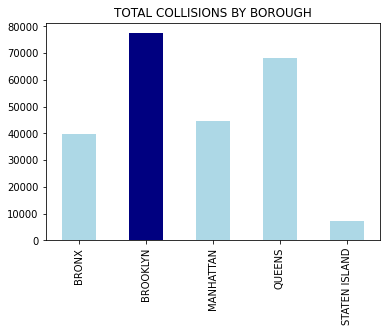

In [23]:
# Print the value counts for 'BOROUGH'
print(df['BOROUGH'].value_counts())
print('')

# Print the value counts percentage for'BOROUGH'
print(df['BOROUGH'].value_counts(normalize=True))

# Barplot showing Brooklyn had the highest number of collisions
print('')
print(df['BOROUGH'].value_counts().sort_index().plot(kind='bar', color=('lightblue','navy', 'lightblue', 'lightblue', 'lightblue'), figsize=(6,4), title="TOTAL COLLISIONS BY BOROUGH"))


###Insight: Brooklyn had the highest number of deaths and injured

AxesSubplot(0.125,0.125;0.775x0.755)


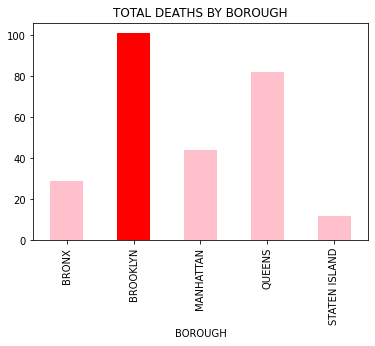

AxesSubplot(0.125,0.125;0.775x0.755)


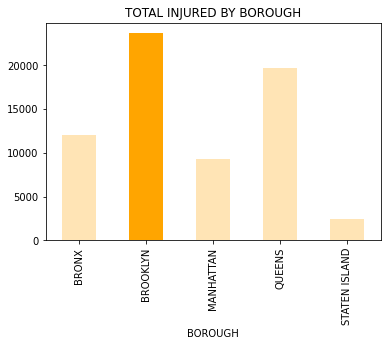

In [24]:
# Bar plot showing Broolyn had the highest number of deaths
# Plot sum of 'NUMBER OF PERSONS KILLED' for each 'BOROUGH'
total_death=df.groupby(['BOROUGH'])['NUMBER OF PERSONS KILLED'].sum().plot(kind='bar', color=('pink','red', 'pink', 'pink', 'pink'), title="TOTAL DEATHS BY BOROUGH")
print(total_death)
plt.show()

# Bar plot showing Broolyn had the highest number of injured
# Plot sum of 'NUMBER OF PERSONS INJURED' for each 'BOROUGH'
total_injured=df.groupby(['BOROUGH'])['NUMBER OF PERSONS INJURED'].sum().plot(kind='bar', color=('moccasin', 'orange', 'moccasin', 'moccasin', 'moccasin'), title="TOTAL INJURED BY BOROUGH")
print(total_injured)
plt.show()

###Trend of Collisions Over Time

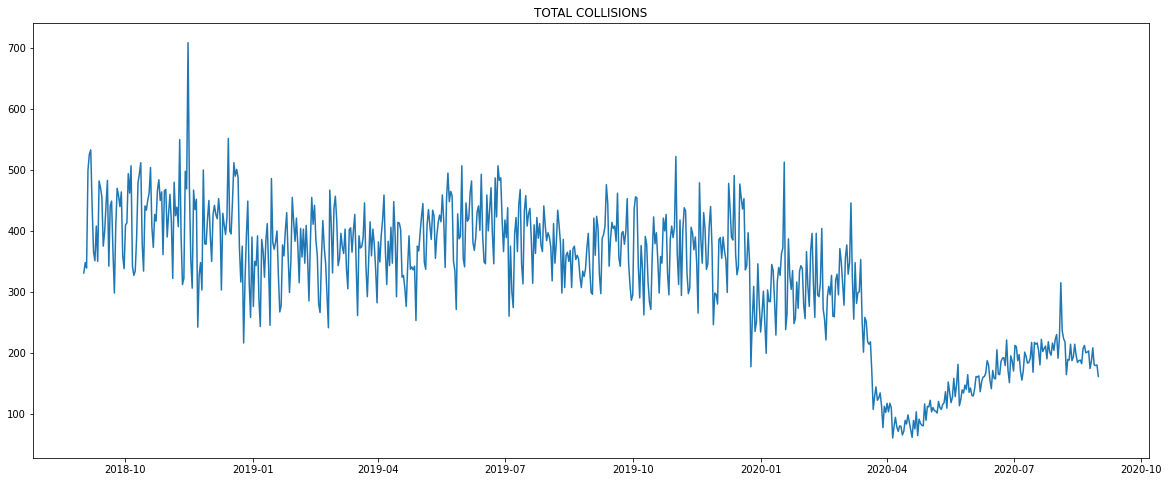

In [27]:
# Plot number of collisions over time
plt.figure(figsize=(20,8))
plt.title('TOTAL COLLISIONS')
plt.plot(df['CRASH DATE'].value_counts().sort_index())